In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import seaborn as sns
np.set_printoptions(suppress=True)

plt.style.use('../code_snippets_settings/matplotlibrc') # this file sets our global settings for plotting(makes less bloated in the notebook)

# Use to search local csv
# Get-ChildItem -Recurse | Select-String "dummy" -List | Select Path

path = 'https://www.openintro.org/data/csv/' # url path to openintro.org data # access remote source

# path = %pwd # local path if you had downloaded the data
# path += '/csv/' 

# Chapter 1 

### Chapter headers are hyperlinks to locations in the book

---

## [Data basics `stent30`, `stent365`](../assets/os3.pdf#page=7&zoom=100,145,868)

In [2]:
p_30 = pd.read_csv(path+"stent30.csv", header=0, names=['group', '0-30'])
p_365 = pd.read_csv(path+"stent365.csv", header=0, names=['group', '0-365'])

one_one = p_30.merge(
    p_365, 
    on='group', 
    left_index=True,
    right_index=True
    ).set_index(np.arange(1, 452))

one_one.index.name = 'patient'
one_one.head()

,group,0-30,0-365
patient,,,
1,treatment,stroke,stroke
2,treatment,stroke,stroke
3,treatment,stroke,stroke
4,treatment,stroke,stroke
5,treatment,stroke,stroke


In [3]:
one_two = (one_one.groupby('group')
           .agg({'0-30': 'value_counts', '0-365': 'value_counts'})
           .unstack(1)
#            .droplevel(1, axis=1)
          )

one_two.columns.names = ['days', 'outcome']
one_two

days          0-30           0-365       
outcome   no event stroke no event stroke
group                                    
control        214     13      199     28
treatment      191     33      179     45

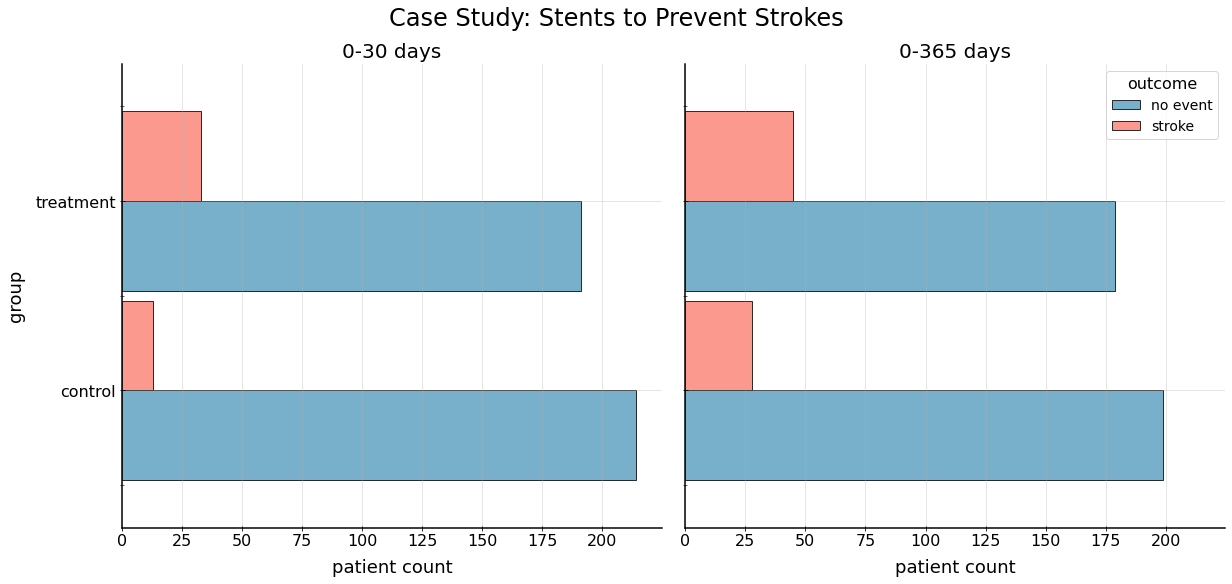

In [194]:
fig, axes1=(_, _) = plt.subplots(1,2,sharey=True, figsize=(17, 8), sharex=True, constrained_layout=True);
fig.suptitle('Case Study: Stents to Prevent Strokes');

zip_package = list(zip(                     
    axes1,                                  # sublot axes
    [one_two['0-30'], one_two['0-365']],    # Series from  
    ['0-30 days', '0-365 days'],            # subplot titles
    ['patient count'] * 2,                  # xlabels
    ['group', None],                        # ylabels
    [False, True],                          # subplot legends
))


for (ax, df, title, xlabel, ylabel, legend) in zip_package: 
    df.plot.barh(ax=ax, alpha=0.8,legend=legend,label=title, width=0.95,color=['#569BBD', 'salmon'], edgecolor='black'); 
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel); 

---

## [`email50`](../assets/os3.pdf#page=10&zoom=100,145,868)

page 10

In [5]:
one_three = pd.read_csv(
    path+"email50.csv", 
    header=0)
one_three.head(3)

,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,1,2012-01-04 05:19:16,0,0,0,no,...,0,0,21.705,551,1,1,0,0,8,small
1,0,0,1,0,0,2012-02-16 12:10:06,0,0,0,no,...,0,0,7.011,183,1,0,0,0,1,big
2,1,0,1,4,0,2012-01-04 07:36:23,0,2,0,no,...,0,0,0.631,28,0,0,0,0,2,none


---
## [1.2.3 Relationship between variables `county`](../assets/os3.pdf#page=14&zoom=100,145,868)

page 14

*Does not contain `fed_spend` column as is assumed in the book so I chart other variables*  


In [6]:
one_five = pd.read_csv(
    path+"county.csv", 
    header=0)
one_five.head(3)

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial


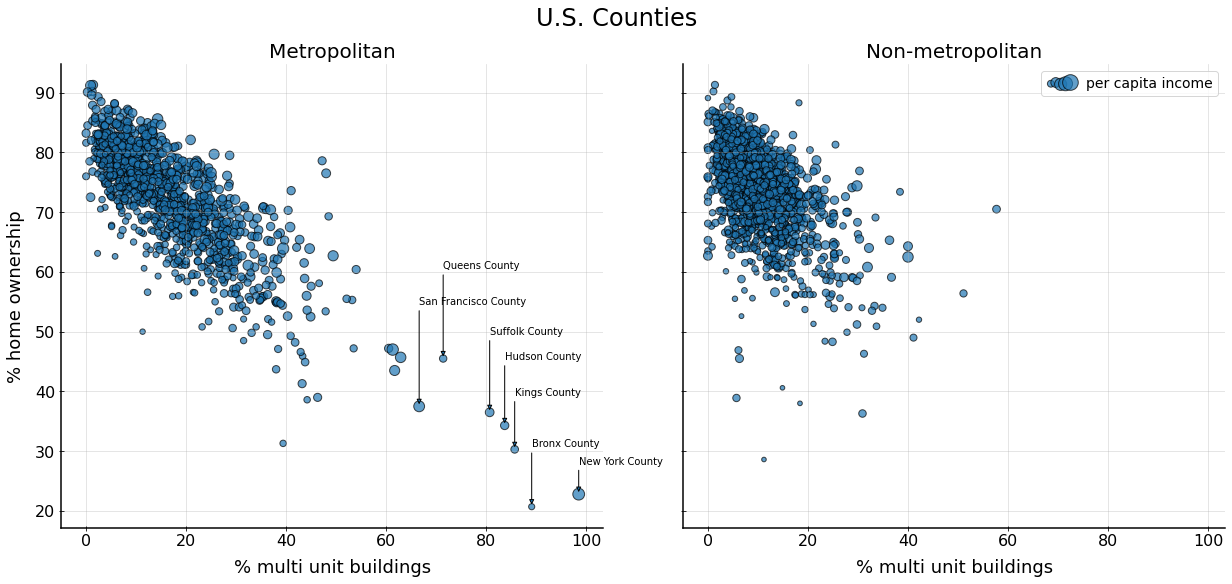

In [176]:
fig, axes=(_, _) = plt.subplots(1,2,sharey=True, figsize=(17, 8), sharex=True,constrained_layout=True)
fig.suptitle('U.S. Counties');

zip_package = list(zip(
    (axes),                                   # subplot axes
    [one_five[(one_five.metro == 'yes')],     # dataframes
        one_five[(one_five.metro == 'no')]],  
    ['Metropolitan','Non-metropolitan'],      # subplot titles
    ['% multi unit buildings']*2,             # xlabels
    ['% home ownership', None]                # ylabels
))

# Plotting general
for ax, df, title, x,y in zip_package: 
    ax.scatter(
        data=df, y='homeownership', x='multi_unit', s=df['per_capita_income']/500, 
        alpha=0.7, label='per capita income', 
        # color='lightblue', 
        edgecolors='black'
        ); 
    ax.set(title=title, xlabel=x, ylabel=y);

# Outliers annotation
outliers = one_five[(one_five.multi_unit > one_five.multi_unit.quantile(0.995) ) &
                    (one_five.homeownership < one_five.homeownership.quantile(0.05))].nlargest(7, 'multi_unit')


offset = [ 5,  10,  9, 11, 13, 15, 17]
for i in range(outliers.shape[0]):
    county = outliers.name.tolist()[i]
    x, y = outliers.multi_unit.tolist()[i], outliers.homeownership.tolist()[i]
    axes[0].annotate(county,(x,y),xytext=(x, y+offset[i]),
                     arrowprops = dict(arrowstyle = "-|>",
                                       connectionstyle = "angle,angleA=0,angleB=90,rad=10"))
        
axes[1].legend();

## [1.4 Four sampling methods](../assets/os3.pdf#page=20&zoom=100,145,868)

In [8]:
import random

mlb = pd.read_csv(path+'/mlb.csv')
frac = 120/mlb.shape[0] # shooting for 120 observations as per book
frac

0.14492753623188406

**Simple random sampling**

In [9]:
simple = mlb.sample(frac=frac)
simple.shape[0]

120

**Simple stratified**

In [10]:
strat = (mlb.groupby('team')
         .apply(lambda x: x.sample(n=4)))
strat.shape[0]

120

**Cluster sample**  
*Easy/cheap*

In [11]:
cluster_sample = random.sample(set(mlb.team), int(frac * mlb.team.nunique()))

cluster = mlb[mlb.team.isin(cluster_sample)]
cluster.shape[0] # wont equal 120 because team sizes are different

113

**Multistage cluster sample**  
*This type of sampling is easiet/cheapest*

In [12]:
multi_stage_cluster_sample = random.sample(set(mlb.team), int(frac * mlb.team.nunique()))

multistage_grouped = (mlb[mlb.team.isin(multi_stage_cluster_sample)]
                      .groupby('team')
                      .apply(lambda x: x.sample(frac=frac)))

multistage_grouped.shape[0] # 4 teams by 4 players each

16

## [1.6 Examining numerical data](../assets/os3.pdf#page=26&zoom=100,145,868)

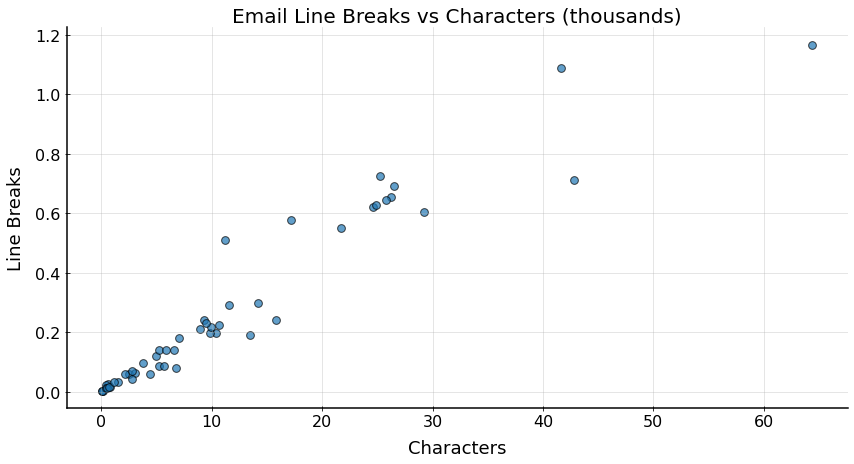

In [13]:
one_six_one = pd.read_csv(
    path+"email50.csv"
)

one_six_one['line_breaks'] = one_six_one['line_breaks'] / 1000


one_six_one.plot.scatter(
    x='num_char', 
    y='line_breaks',
    alpha=0.7, s=60
).set(xlabel='Characters', ylabel='Line Breaks', title='Email Line Breaks vs Characters (thousands)');


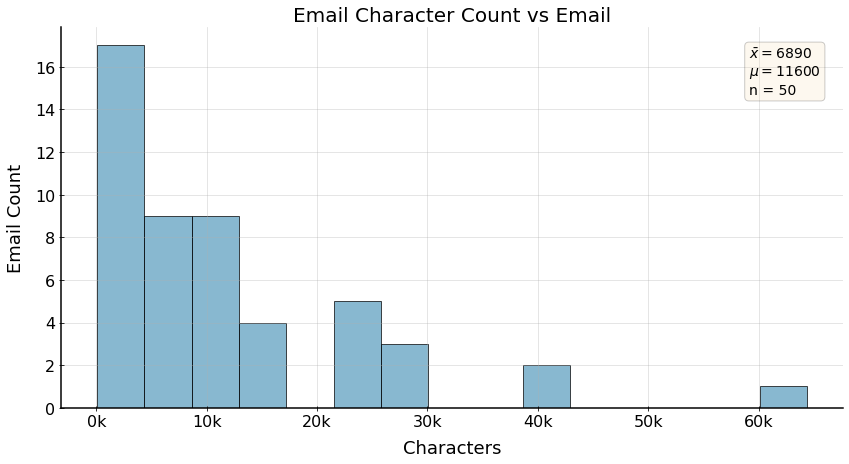

In [178]:
fig, ax = plt.subplots()

one_six_two = pd.read_csv(path + 'email50.csv')

mean = (one_six_two['num_char'].mean().round(2) * 1000).astype(int)
median = (one_six_two['num_char'].median().round(2) * 1000).astype(int)
# max_chars = (one_six_two['num_char'].max().round(2) * 1000).astype(int)
sample = (one_six_two['num_char'].shape[0])

textstr = '\n'.join((
#     r'$\mathrm{median}=%.0f$' % (median),
    r'$\barx=%.0f$' % (median),
    r'$\mu=%.0f$' % (mean),
    r'n = %.f' % (sample)
))
    
props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
ax.text(0.88, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

one_six_two['num_char'].round(2).plot( 
    ax = ax,
    kind = 'hist', 
    x = 'num_char', 
    bins = 15, 
    alpha = 0.7,
    edgecolor='black',
    color='#569BBD'
).set(
    xlabel = 'Characters', 
    ylabel = 'Email Count', 
    title = 'Email Character Count vs Email')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0fk'))
# mean_line = ax.plot([one_six_two['num_char'].mean() for i in range(100)], label='Mean', linestyle='--', linewidth=1.3, c='gray')

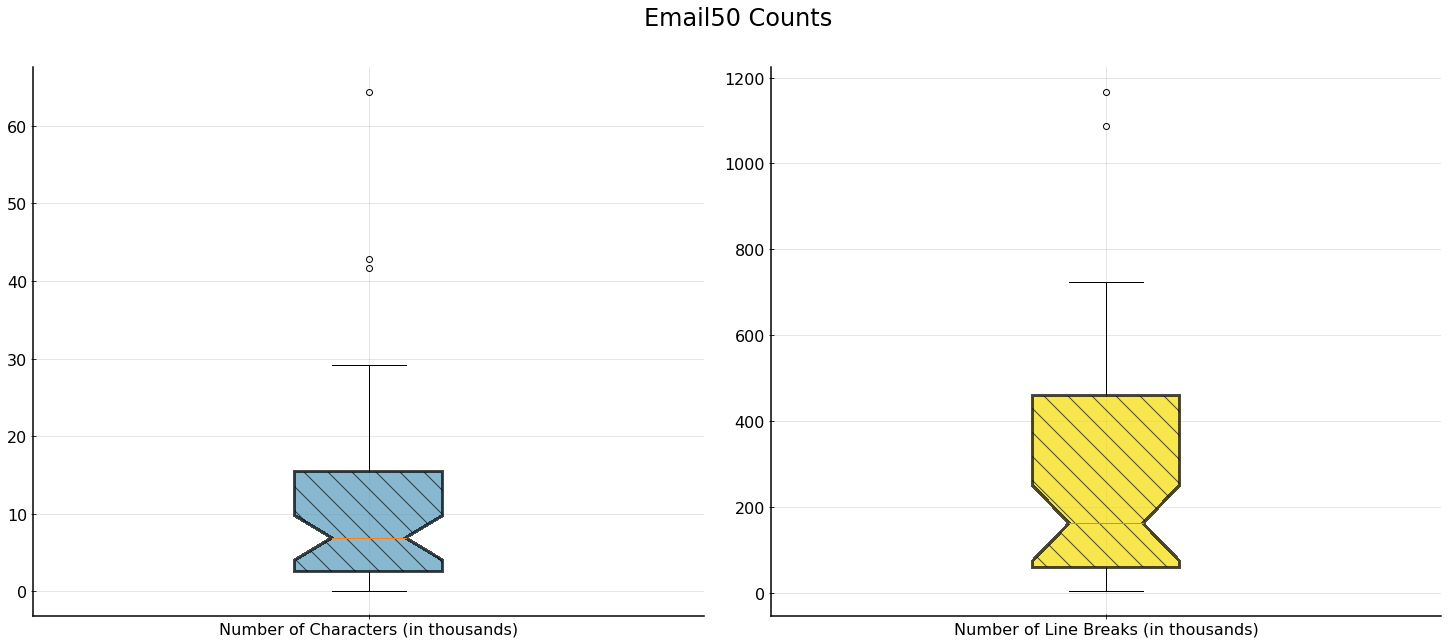

In [190]:
# https://matplotlib.org/3.3.3/gallery/statistics/boxplot_color.html

one_six_five = pd.read_csv(path + 'email50.csv', parse_dates=['time'])[['num_char', 'line_breaks']]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), sharey=False, constrained_layout=True)
fig.suptitle('Email50 Counts', y=1.1, x=0.51)
# x = np.zeros(one_six_five.shape[0])

for col, ax, color, labels in zip(one_six_five.columns, axes, ['#569BBD', "#F4DC00"], ['Characters', 'Line Breaks']):
    # ax.spines['right'].set_visible(True)
    # ax.spines['top'].set_visible(True)
    bplot = ax.boxplot(
        one_six_five[col],
        notch=True,
        vert=True,
        labels=[f'Number of {labels} (in thousands)'],
        patch_artist=True,
        widths=0.22
        )
    box_patch = bplot['boxes'][0]
    box_patch.set_facecolor(color)
    box_patch.set_hatch('\\')
    box_patch.set_alpha(0.7)
    box_patch.set_aa(0)
    box_patch.set_linewidth(2)
    
    # ax.scatter(
    #     x,
    #     one_six_five[col],
    #     alpha=0.2,
    #     c='k'
    # )

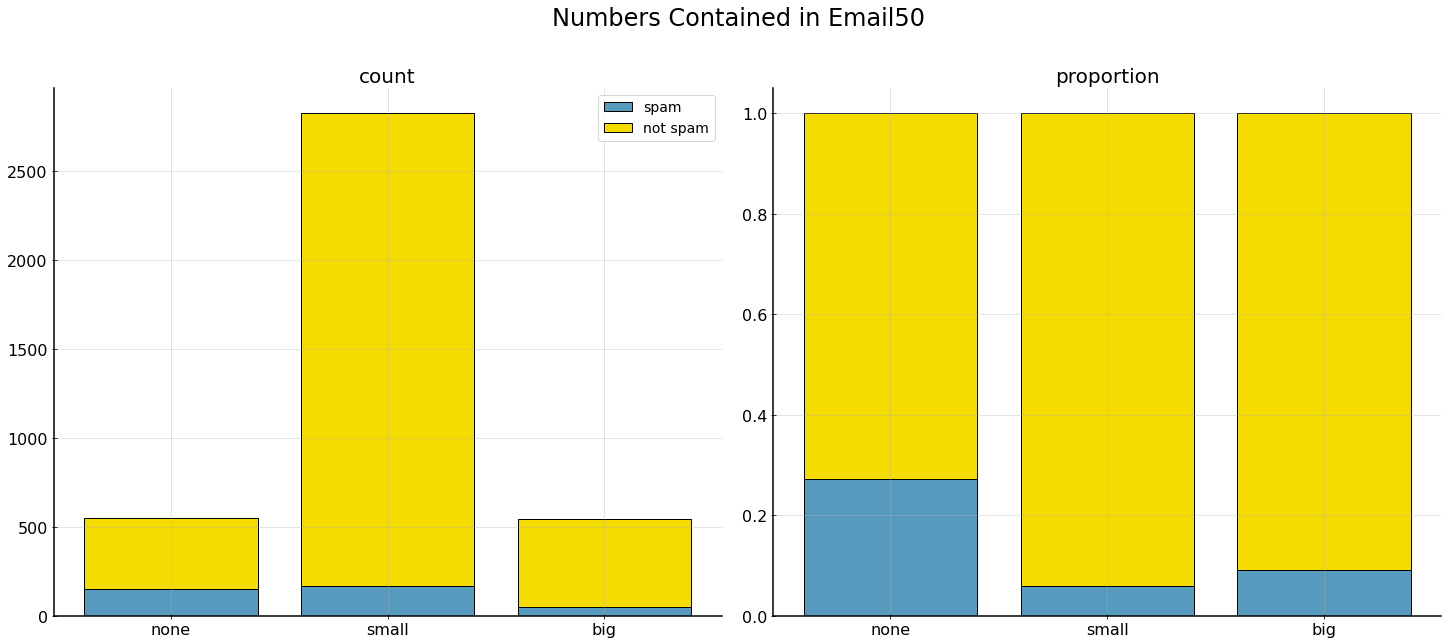

In [204]:
one_seven_one = pd.read_csv(path + 'email.csv')
one_seven_one['spam'] = one_seven_one['spam'].map({0: 'not spam', 1: 'spam'})
one_seven_one = one_seven_one.groupby('spam')['number'].agg('value_counts').unstack()[::-1][['none', 'small', 'big']]
one_seven_one_percent = (one_seven_one / one_seven_one.sum())#[::-1][['none', 'small', 'big']]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), sharey=False, constrained_layout=True)

fig.suptitle('Numbers Contained in Email50', y=1.1, x=0.51)

plot_dfs = [one_seven_one, one_seven_one_percent]

for df, ax, color, labels in zip(plot_dfs, axes, ['#569BBD', "#F4DC00"], ['count', 'proportion']):
    ax.bar(df.columns, df.loc['spam'], color='#569BBD', edgecolor='black', label='spam')
    ax.bar(df.columns, df.loc['not spam'], bottom=df.loc['spam'], color="#F4DC00", edgecolor='black', label='not spam')
    # ax.set_capstyle('round')
    ax.set(title=labels)
axes[0].legend()



In [249]:
one_seven_five = pd.read_csv(path + 'county.csv').groupby('name').agg(
    {
        'pop2000': 'sum', 
        'pop2010': 'sum', 
        'median_hh_income': 'mean'}
    )

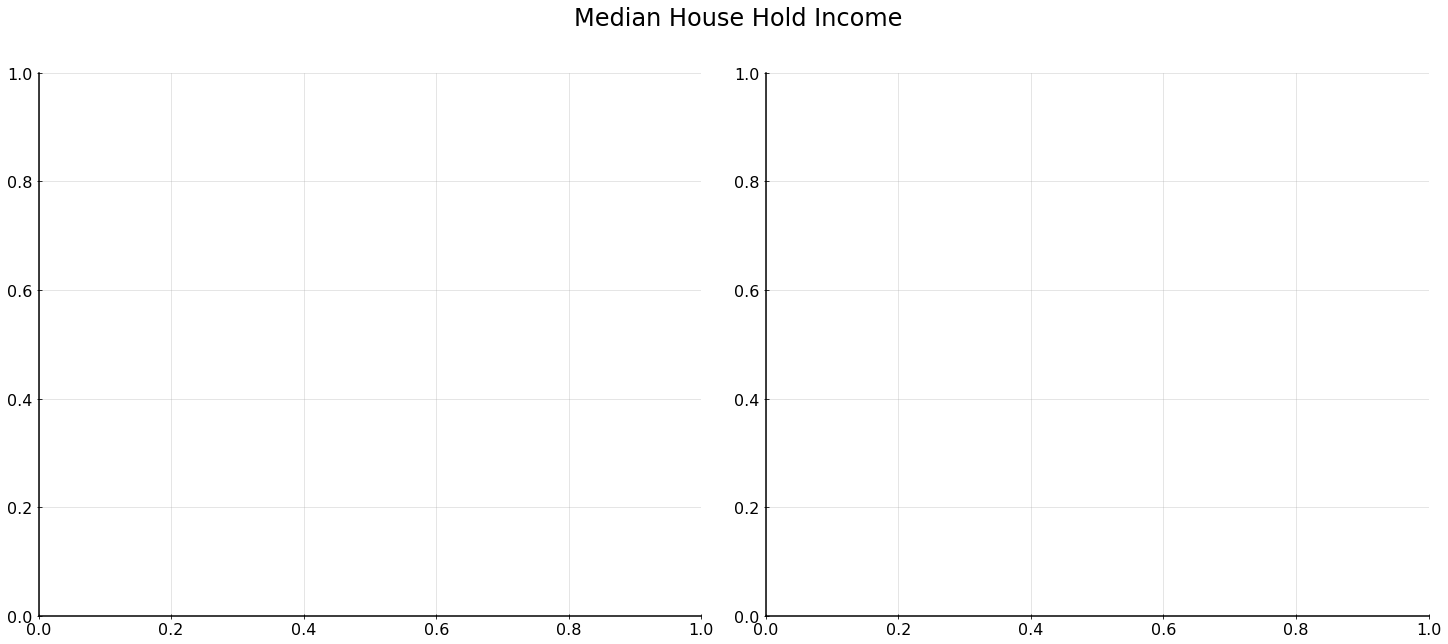

In [270]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), sharey=False, constrained_layout=True)

fig.suptitle('Median House Hold Income', y=1.1, x=0.51)


plot_dfs = [
    one_seven_five.query('pop2010 > pop2000'),
    one_seven_five.query('pop2010 <= pop2000'), 
    ]



# ax.boxplot(plot_dfs[0]['median_hh_income'])



axes[0].boxplot(plot_dfs[0]['median_hh_income'])
axes[0].boxplot(plot_dfs[1]['median_hh_income'])


axes[1].plot(plot_dfs[0]['median_hh_income'])
axes[1].plot(plot_dfs[1]['median_hh_income'])


# for df in plot_dfs:
#     for ax, color, labels in zip(axes, ['#569BBD', "salmon"], ['count', 'proportion']):
#         gain_color = labels[0]
#         nogain_color = labels[1]

#         ax.boxplot(
#             df['median_hh_income'],
#             notch=True,
#             vert=True,
#             labels=[f'Number of {labels} (in thousands)'],
#             patch_artist=True,
#             widths=0.22
#         )

plt.show()

#     ax.bar(df.columns, df.loc['spam'], color=gain_color, edgecolor='black', label='spam')

#     ax.bar(df.columns, df.loc['not spam'], bottom=df.loc['spam'], color=nogain_color, edgecolor='black', label='not spam')
#     # ax.set_capstyle('round')
#     ax.set(title=labels)
# axes[0].legend()